In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('1642_dataset_3min.csv') 
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

In [3]:
features = ['air1', 'bathroom1', 'car1', 'clotheswasher1', 'dishwasher1', 
            'disposal1', 'drye1', 'dryg1', 'furnace1', 'grid', 'kitchenapp1', 
            'kitchenapp2', 'livingroom1', 'microwave1', 'oven1', 'refrigerator1',
            'solar', 'utilityroom1', 'venthood1']

In [4]:
data=data[features]

In [5]:
data

,air1,bathroom1,car1,clotheswasher1,dishwasher1,disposal1,drye1,dryg1,furnace1,grid,kitchenapp1,kitchenapp2,livingroom1,microwave1,oven1,refrigerator1,solar,utilityroom1,venthood1
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.001,0.004969,0.001,0.0,0.000990,2.850000e-08,0.001,0.0,0.024392,0.4310,0.003959,0.180134,0.03,0.007959,0.008,0.058938,-0.005,0.0,0.0
2018-01-01 00:03:00,0.001,0.004963,0.001,0.0,0.000988,3.422000e-08,0.001,0.0,0.024670,0.4658,0.003951,0.179761,0.03,0.007951,0.008,0.059126,-0.005,0.0,0.0
2018-01-01 00:06:00,0.001,0.004957,0.001,0.0,0.000986,3.994000e-08,0.001,0.0,0.024948,0.5006,0.003942,0.179388,0.03,0.007942,0.008,0.059313,-0.005,0.0,0.0
2018-01-01 00:09:00,0.001,0.004951,0.001,0.0,0.000984,4.566000e-08,0.001,0.0,0.025227,0.5354,0.003934,0.179014,0.03,0.007934,0.008,0.059501,-0.005,0.0,0.0
2018-01-01 00:12:00,0.001,0.004944,0.001,0.0,0.000981,5.138000e-08,0.001,0.0,0.025505,0.5702,0.003926,0.178641,0.03,0.007926,0.008,0.059689,-0.005,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:45:00,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,0.5870,-0.001000,0.001000,0.03,0.004000,0.008,0.121000,-0.008,0.0,0.0
2018-12-31 23:48:00,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,0.5870,-0.001000,0.001000,0.03,0.004000,0.008,0.121000,-0.008,0.0,0.0
2018-12-31 23:51:00,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,0.5870,-0.001000,0.001000,0.03,0.004000,0.008,0.121000,-0.008,0.0,0.0


In [6]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
def create_sequences(data, time_steps=48):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)


In [ ]:
time_steps = 48 
X, y = create_sequences(data_scaled, time_steps)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(time_steps, X.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(X.shape[2])
])

C:\Users\Abhiraj kumar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 225s 50ms/step - loss: 0.0112 - mae: 0.0673 - val_loss: 6.8970e-04 - val_mae: 0.0141
Epoch 2/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 220s 50ms/step - loss: 0.0022 - mae: 0.0298 - val_loss: 6.9181e-04 - val_mae: 0.0162
Epoch 3/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 221s 50ms/step - loss: 0.0020 - mae: 0.0287 - val_loss: 5.6242e-04 - val_mae: 0.0137
Epoch 4/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 226s 52ms/step - loss: 0.0019 - mae: 0.0280 - val_loss: 4.8001e-04 - val_mae: 0.0127
Epoch 5/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 228s 52ms/step - loss: 0.0019 - mae: 0.0278 - val_loss: 5.0284e-04 - val_mae: 0.0122
Epoch 6/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 219s 50ms/step - loss: 0.0019 - mae: 0.0275 - val_loss: 4.7598e-04 - val_mae: 0.0124
Epoch 7/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 225s 51ms/step - loss: 0.0019 - mae: 0.0272 - val_loss: 5.4094e-04 - val_mae: 0.0131
Epoch 8/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 227s 52ms/step - loss: 0.0019 - mae: 0.0269 - val_loss: 3.9135e-04 - 

In [ ]:
y_pred = model.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
results = []


4379/4379 ━━━━━━━━━━━━━━━━━━━━ 64s 15ms/step
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step


In [16]:
for i, col in enumerate(features):
    train_mae = mean_absolute_error(y_train[:, i], Y_train_pred[:, i])
    train_mse = mean_squared_error(y_train[:, i], Y_train_pred[:, i])
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train[:, i], Y_train_pred[:, i])

    test_mae = mean_absolute_error(y_test[:, i], Y_test_pred[:, i])
    test_mse = mean_squared_error(y_test[:, i], Y_test_pred[:, i])
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test[:, i], Y_test_pred[:, i])

    overfit = "Yes" if (train_rmse - test_rmse) > (0.3 * train_rmse) else "No"

    results.append([col, train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2, overfit])

df_results = pd.DataFrame(results, columns=["Column", "Train MAE", "Test MAE", "Train RMSE", "Test RMSE", "Train R²", "Test R²", "Overfitting?"])
print(df_results)

            Column  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  \
0             air1   0.015601  0.009270    0.022127   0.013826  0.992155   
1        bathroom1   0.004516  0.005345    0.015528   0.017445  0.830621   
2             car1   0.011327  0.011268    0.022294   0.024795  0.990807   
3   clotheswasher1   0.006637  0.005370    0.018374   0.017612  0.971227   
4      dishwasher1   0.008113  0.011911    0.019277   0.021301  0.964888   
5        disposal1   0.014814  0.053892    0.017953   0.055208  0.993954   
6            drye1   0.014181  0.015104    0.019493   0.019790  0.969940   
7            dryg1   0.004971  0.006083    0.017647   0.017959  0.660392   
8         furnace1   0.017994  0.021323    0.023249   0.025398  0.991955   
9             grid   0.009909  0.008299    0.014554   0.012616  0.987983   
10     kitchenapp1   0.008849  0.011420    0.020201   0.023542  0.710320   
11     kitchenapp2   0.004988  0.003356    0.016052   0.012716  0.793068   
12     livin

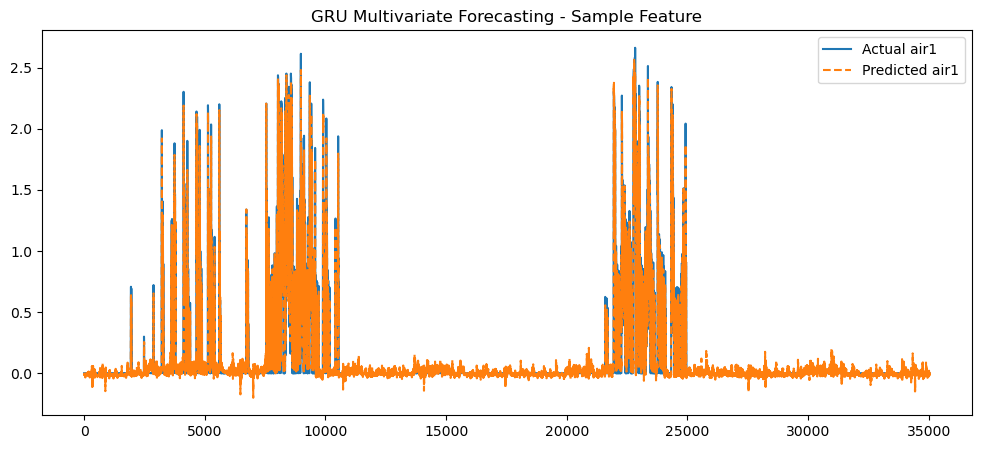

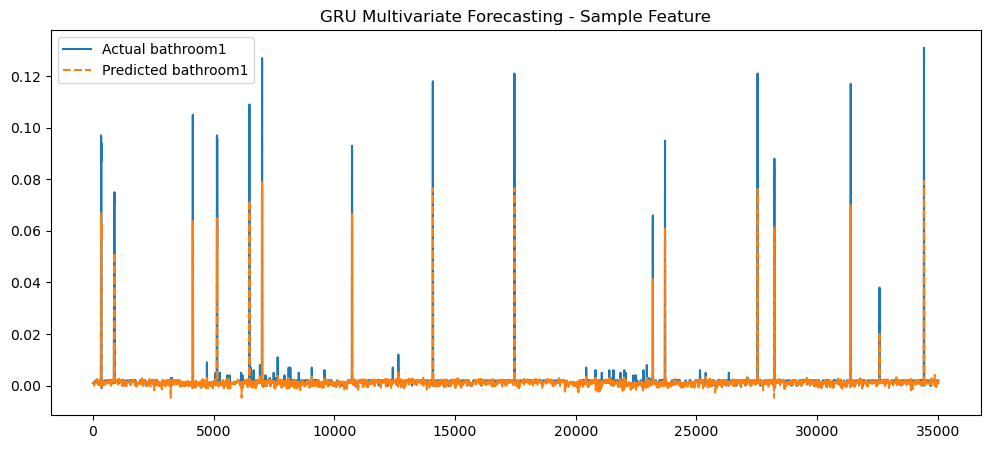

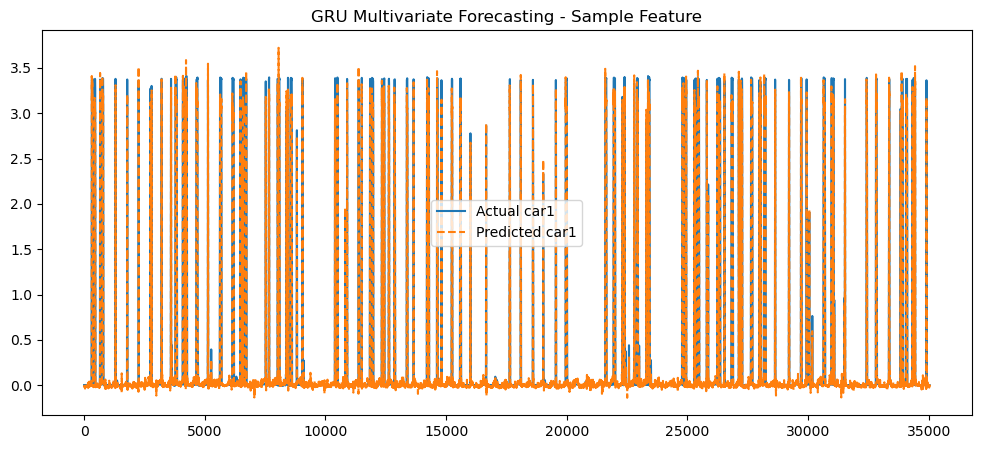

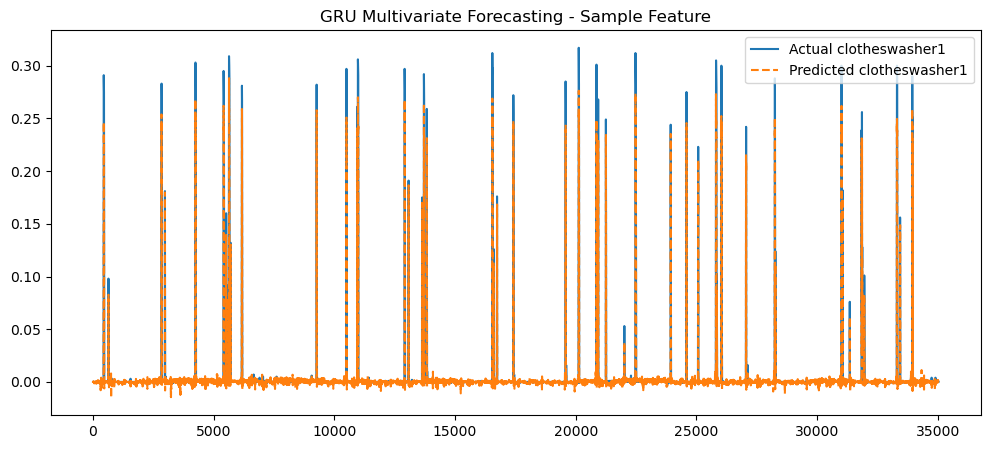

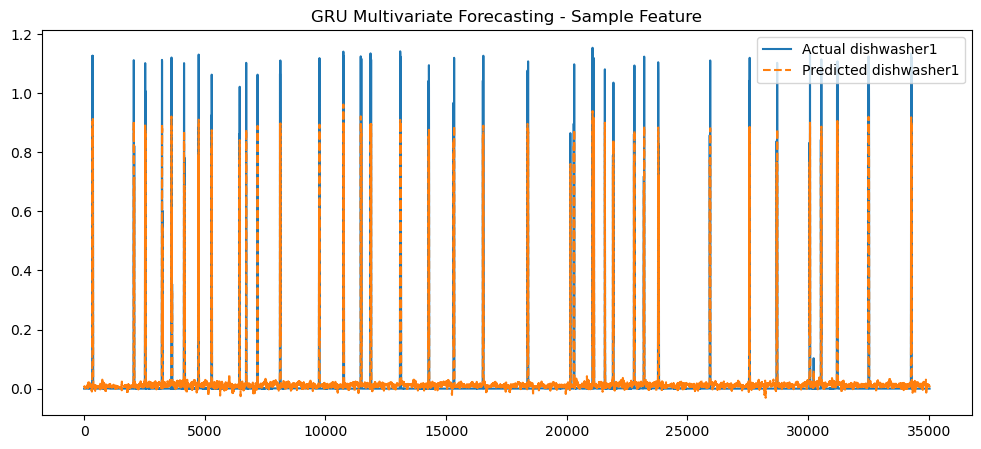

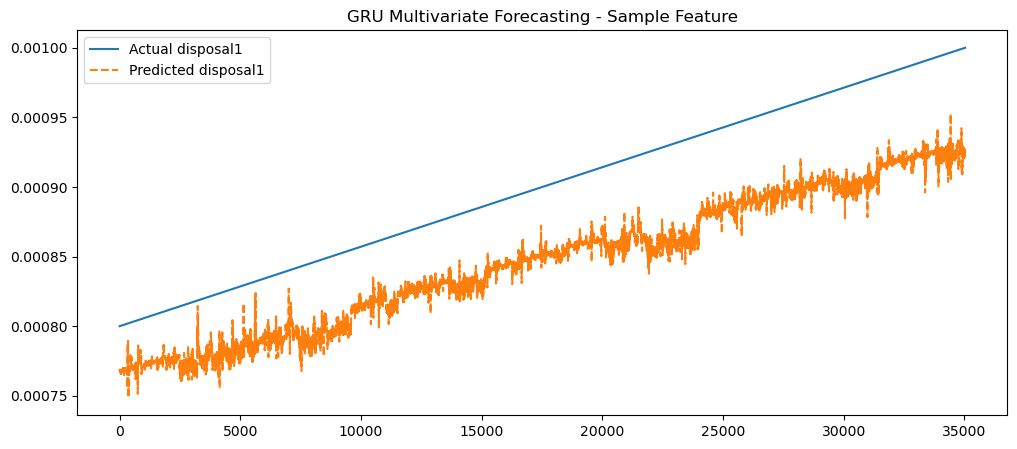

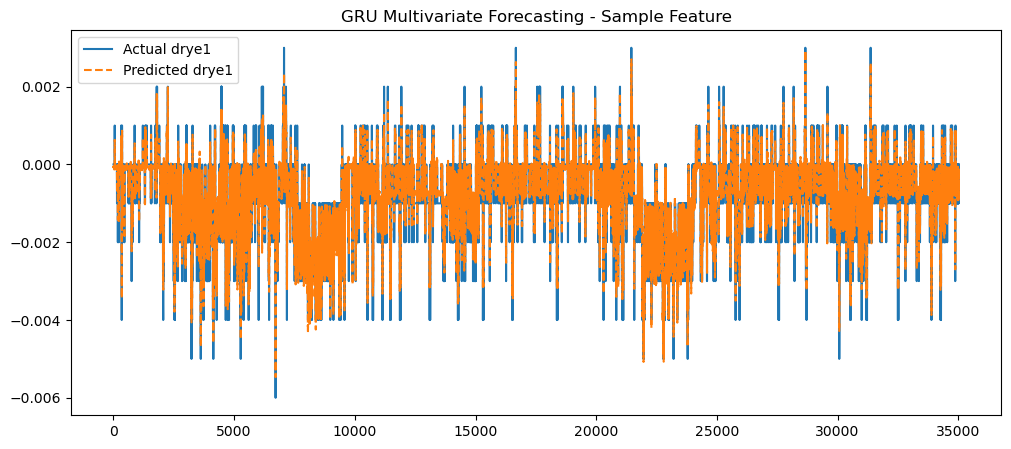

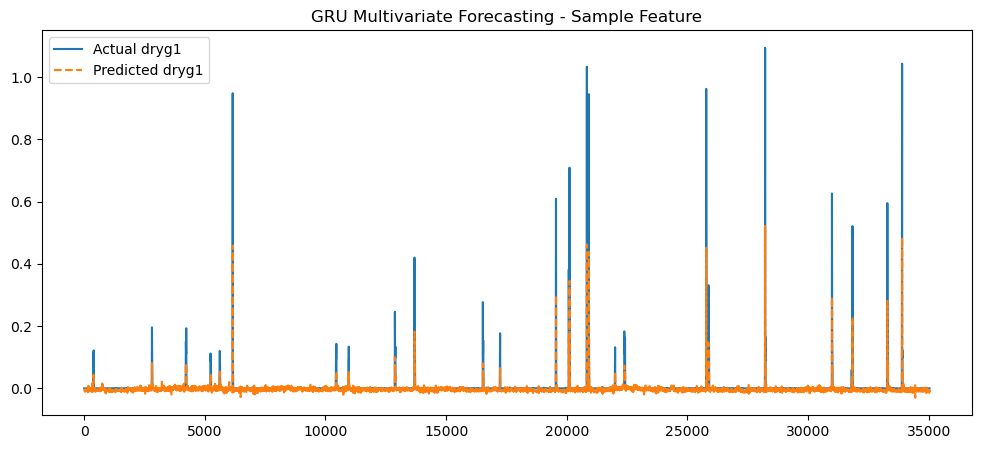

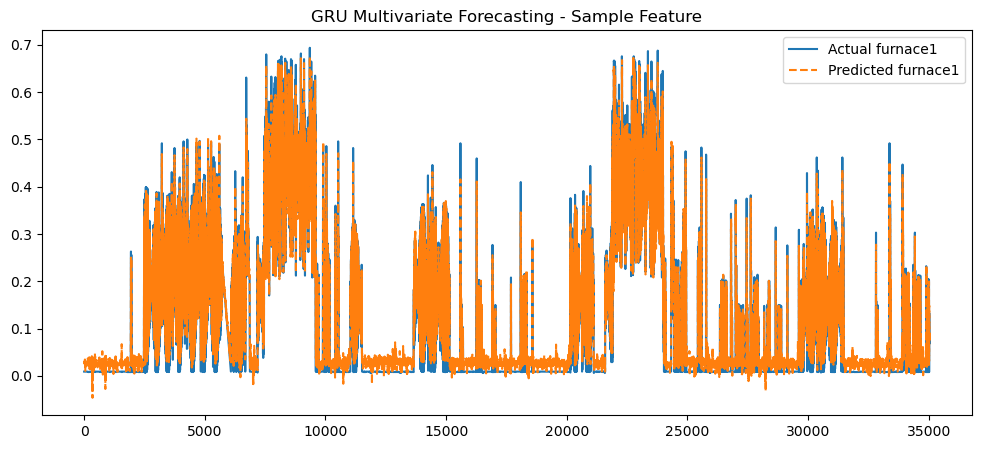

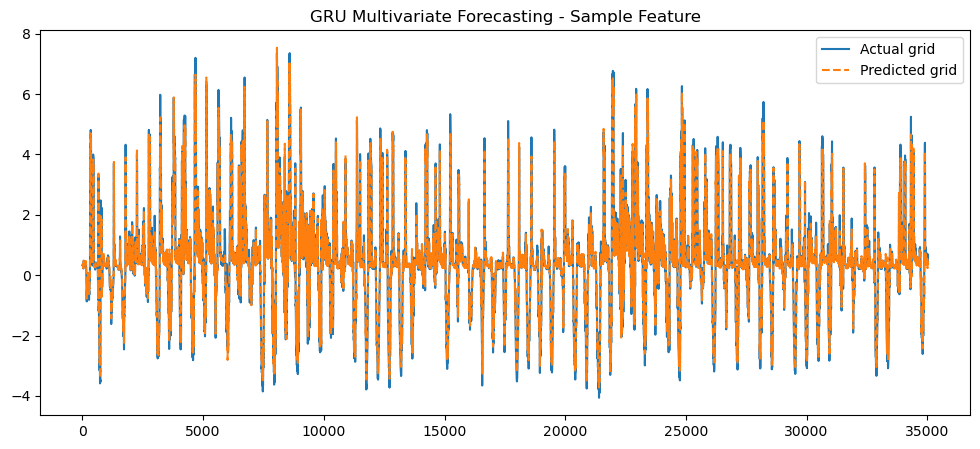

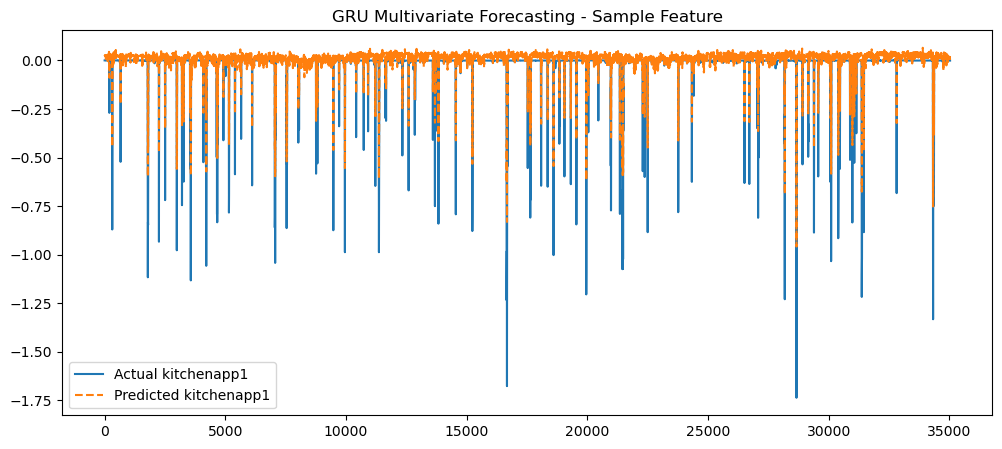

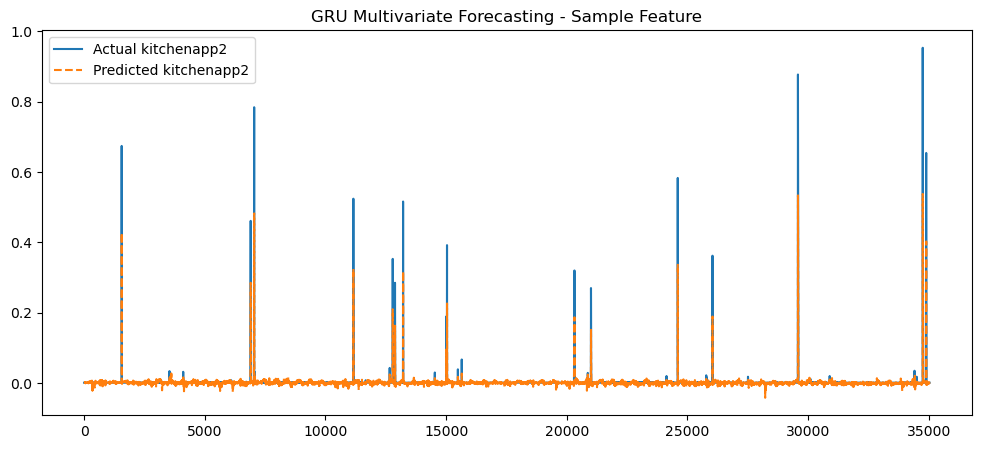

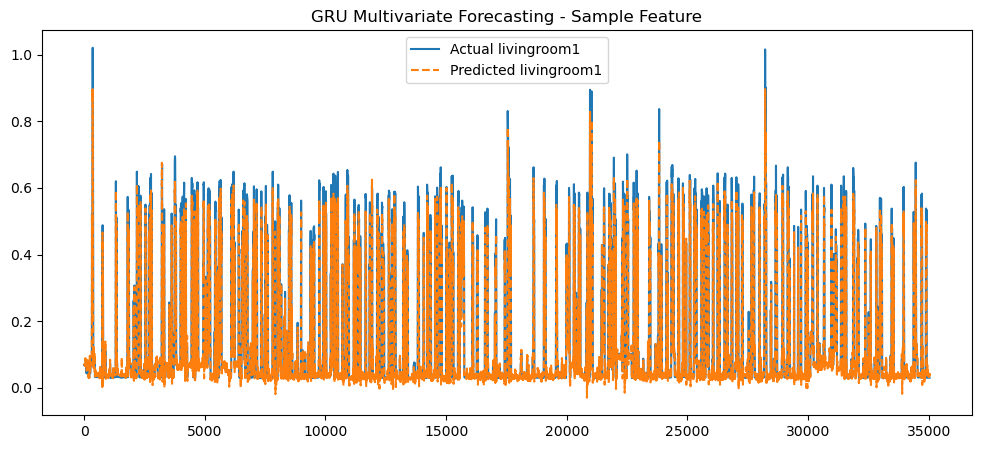

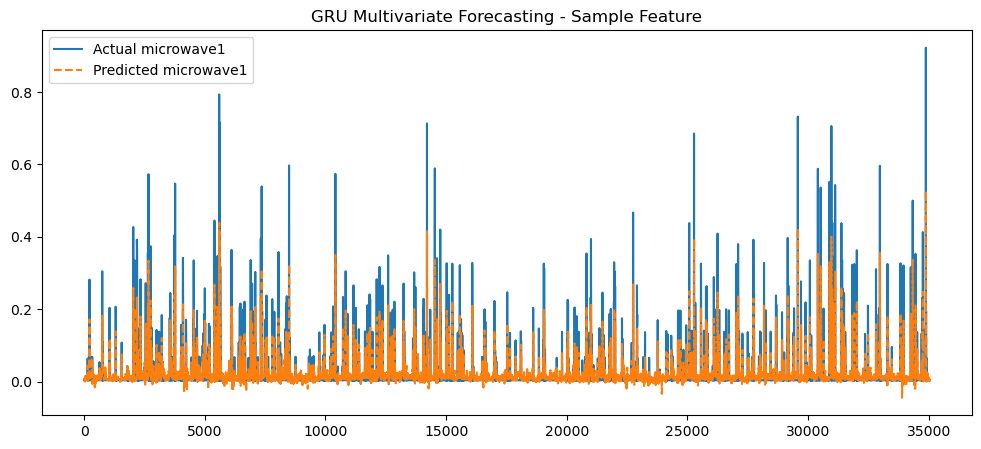

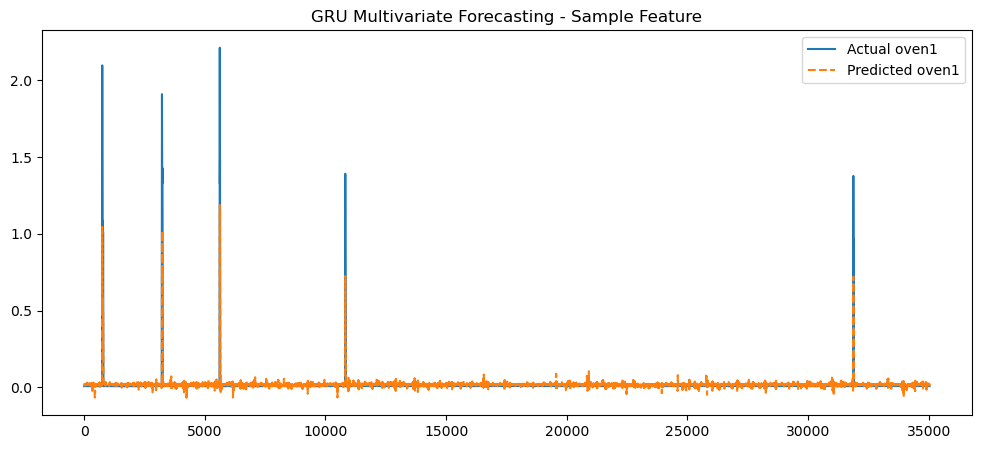

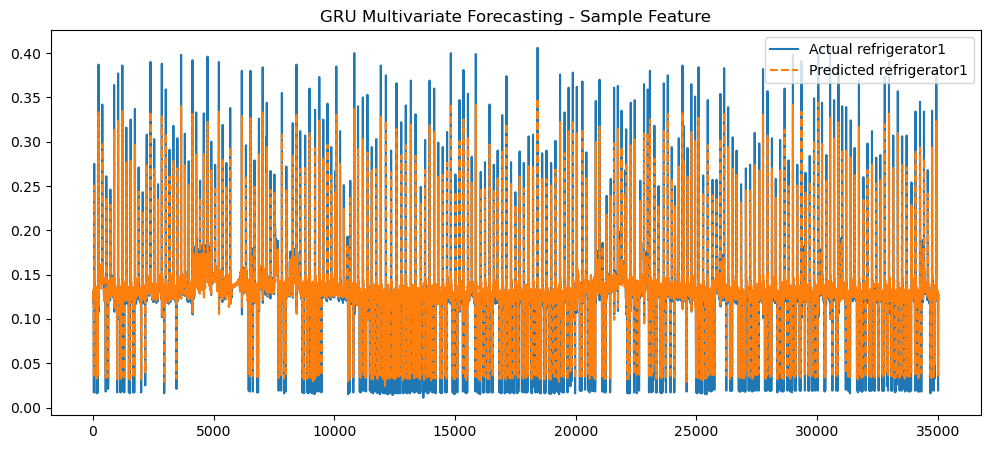

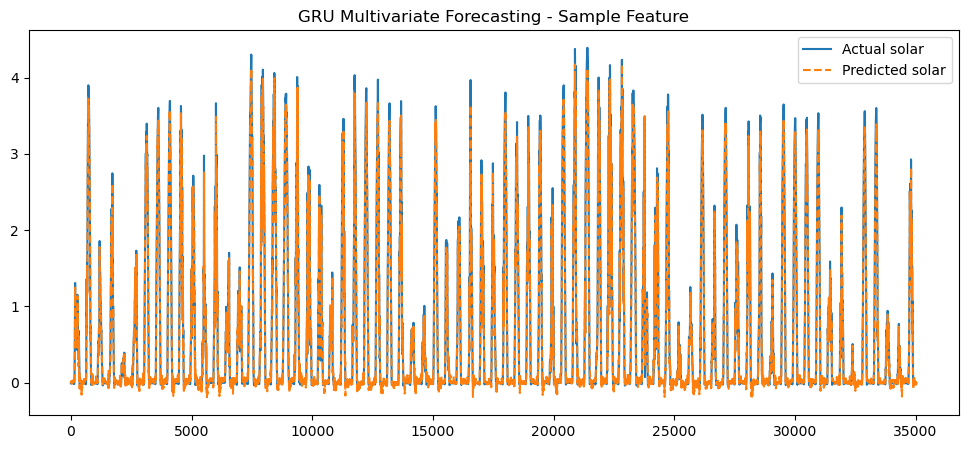

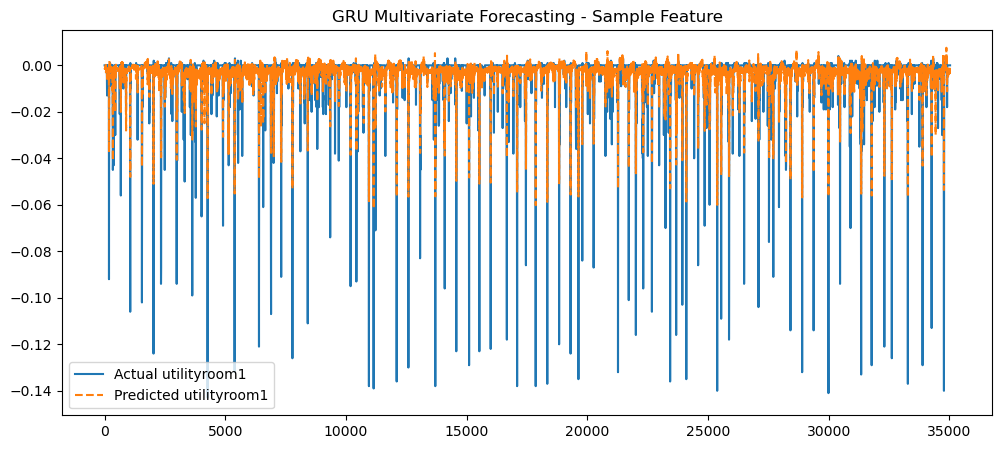

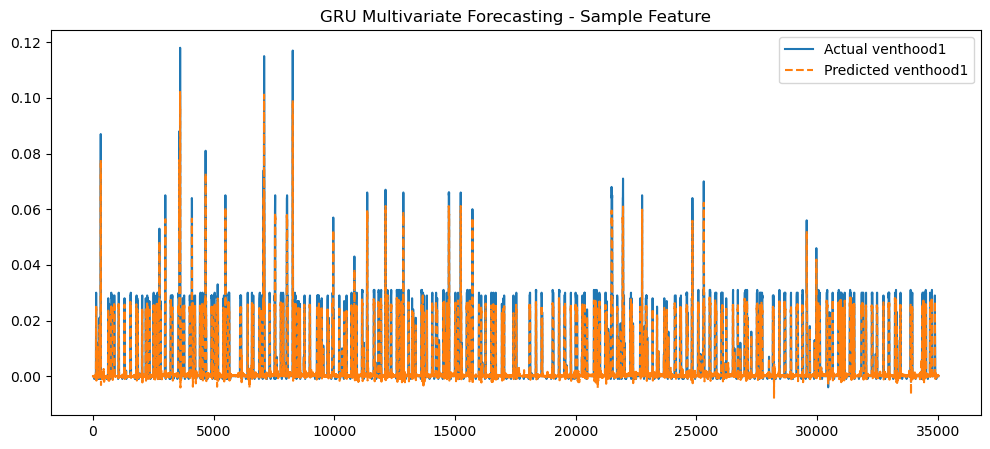

In [17]:
for i in range(len(features)):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test_inv[:, i], label=f'Actual {features[i]}')
    plt.plot(y_pred_inv[:, i], label=f'Predicted {features[i]}', linestyle='dashed')
    plt.legend()
    plt.title('GRU Multivariate Forecasting - Sample Feature')
    plt.show()

In [18]:
def forecast_for_date(model, date, data, time_steps, scaler):
    if date not in data.index:
        raise ValueError("Date not found in dataset")
    
    idx = data.index.get_loc(date)
    if idx < time_steps:
        raise ValueError("Not enough historical data to make a prediction")
    
    input_seq = data.iloc[idx - time_steps:idx].values.reshape(1, time_steps, -1)
    scaled_prediction = model.predict(input_seq)
    prediction = scaler.inverse_transform(scaled_prediction)
    
    return prediction

In [ ]:
specific_date = '2018-06-15 12:00:00' 
forecast = forecast_for_date(model, specific_date, data, time_steps, scaler)
print(f"Forecast for {specific_date}:\n", forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Forecast for 2018-06-15 12:00:00:
 [[ 1.9829562e+00  6.1627605e-04 -1.3256031e-01  4.7584567e-03
   4.9364818e-03  1.3143908e-04 -6.0279807e-03  3.5383742e-02
   7.3979974e-01 -8.7880459e+00 -5.2506459e-01 -6.3294664e-02
   4.3700138e-01  2.1048109e-01 -1.7001286e-01  1.5634109e-01
   1.2913812e+01 -5.0232965e-02  3.2395571e-02]]


In [20]:
result = data.loc["2018-06-15 12:00:00"]

In [21]:
result

air1              0.359000
bathroom1         0.001000
car1              0.005000
clotheswasher1    0.000000
dishwasher1       0.001000
disposal1         0.000453
drye1            -0.002000
dryg1             0.000000
furnace1          0.519000
grid             -1.268000
kitchenapp1       0.000000
kitchenapp2       0.002000
livingroom1       0.155000
microwave1        0.082000
oven1             0.008000
refrigerator1     0.141000
solar             2.714000
utilityroom1      0.000000
venthood1         0.000000
Name: 2018-06-15 12:00:00, dtype: float64

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

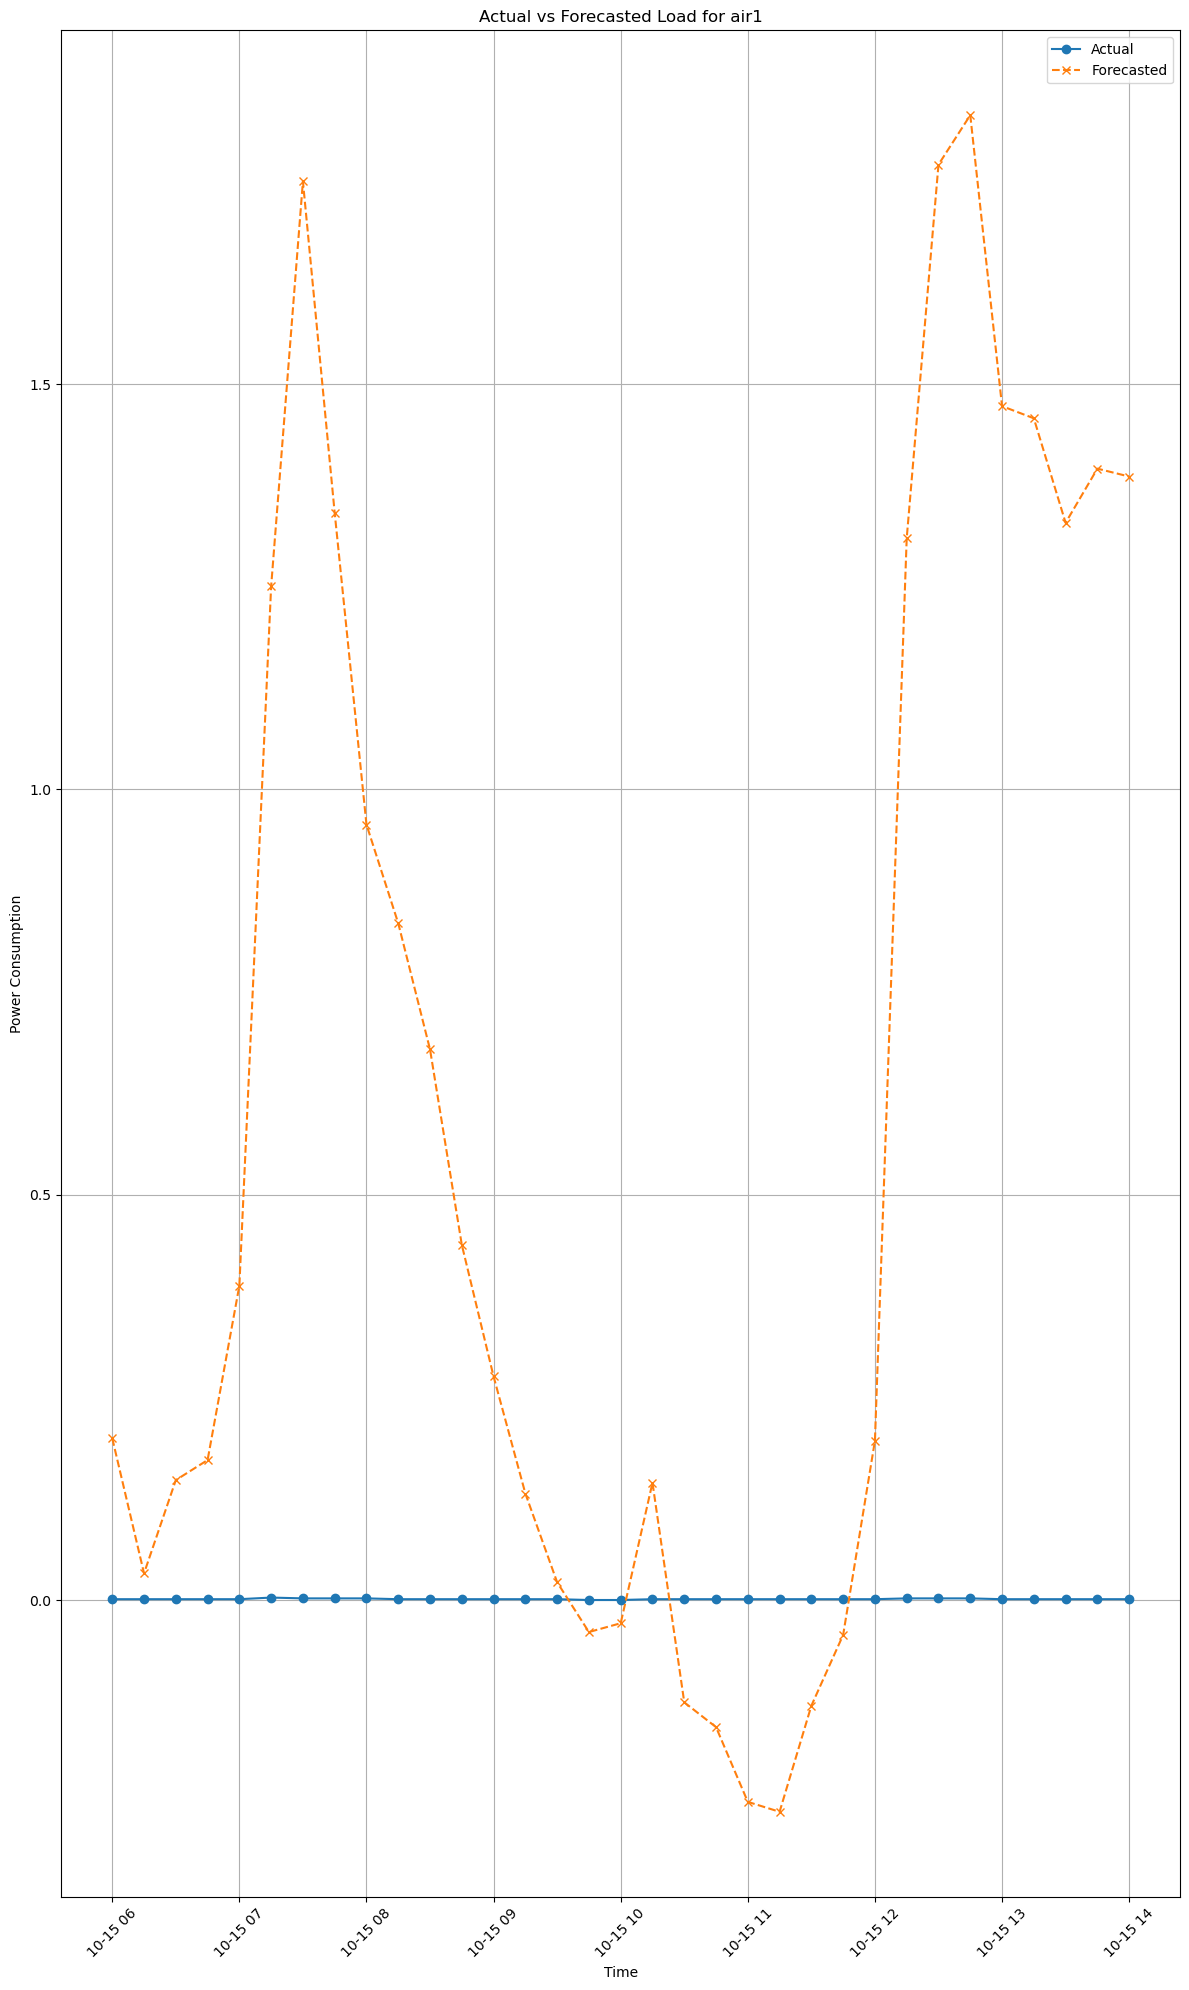

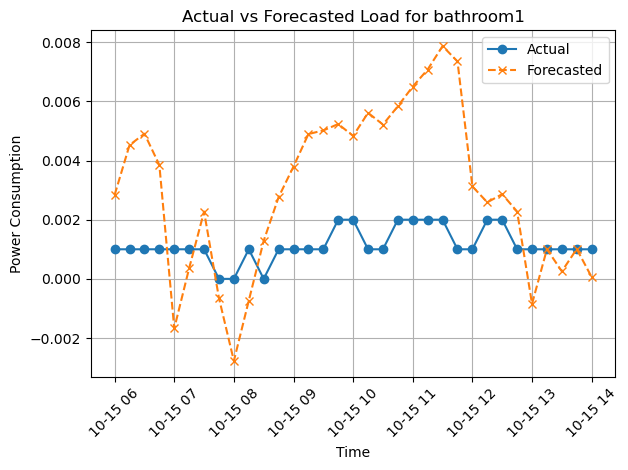

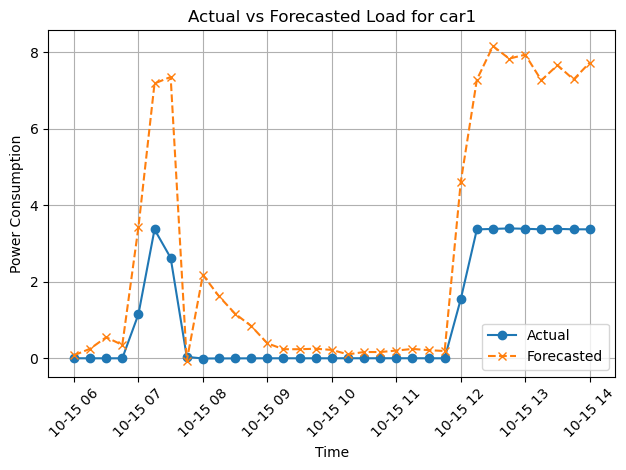

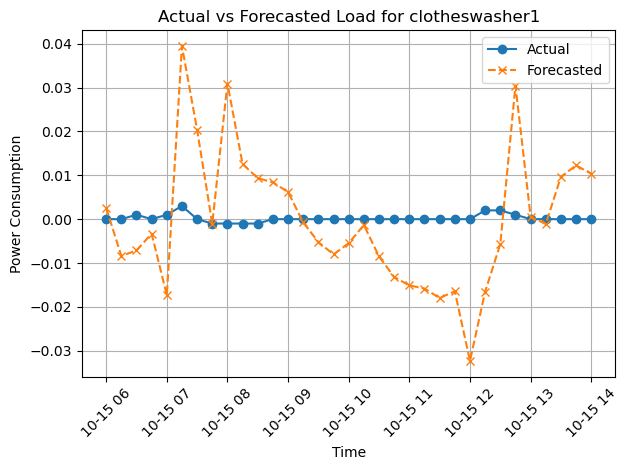

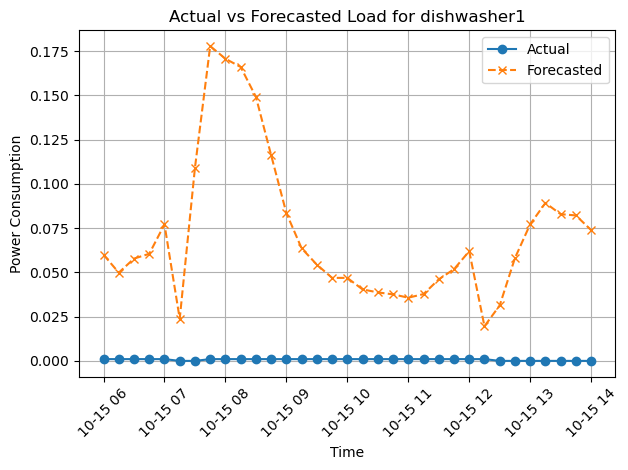

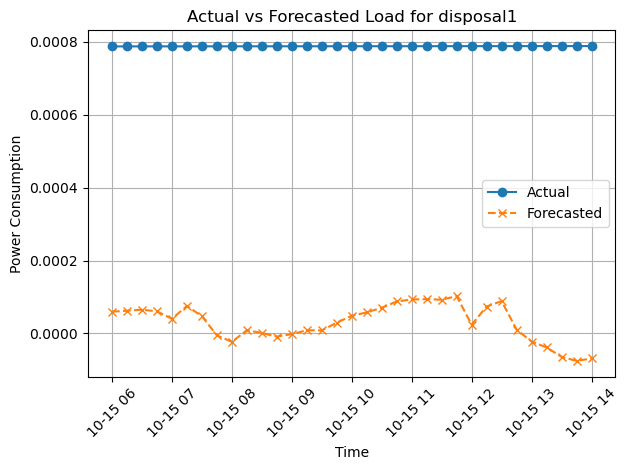

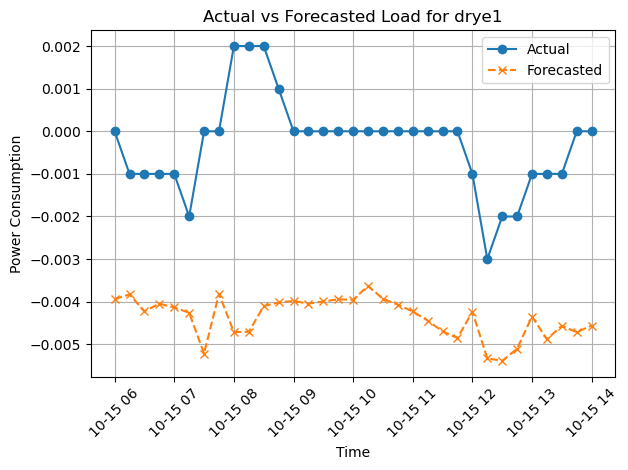

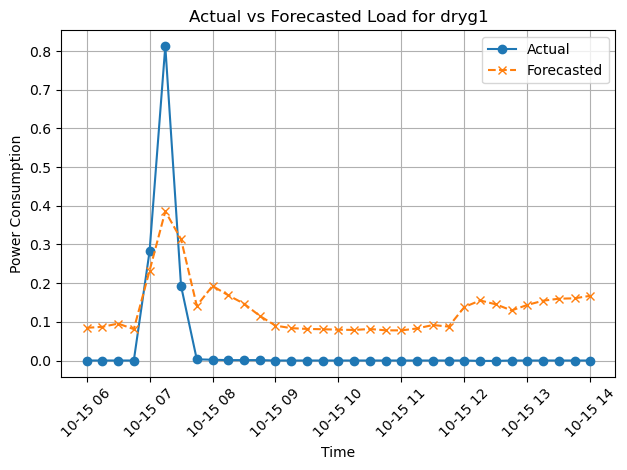

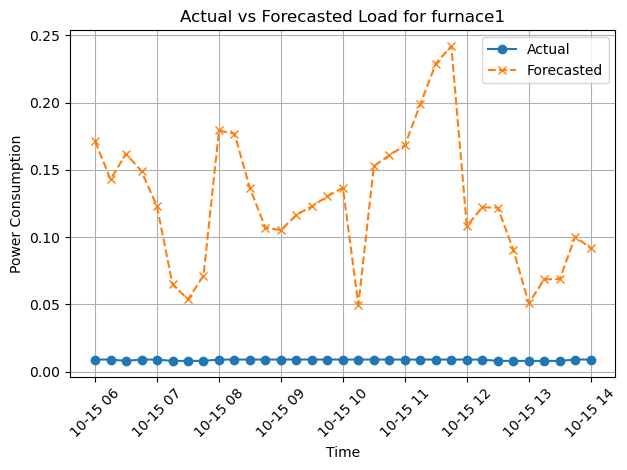

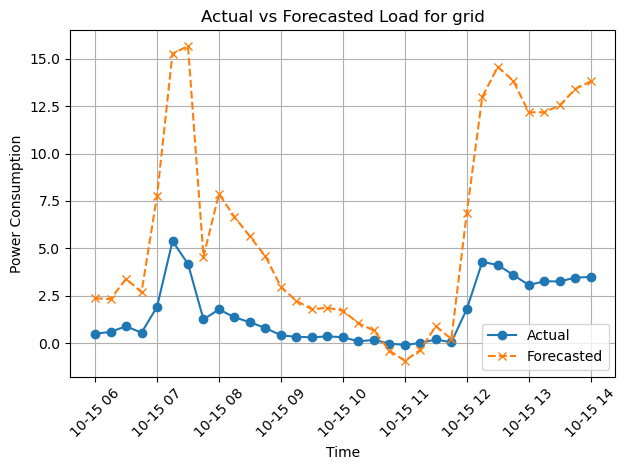

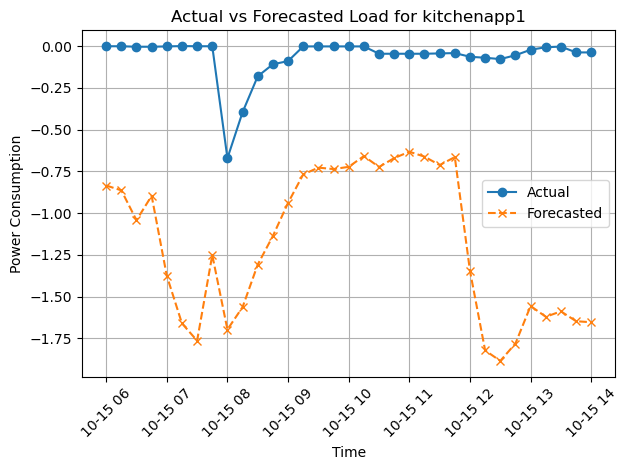

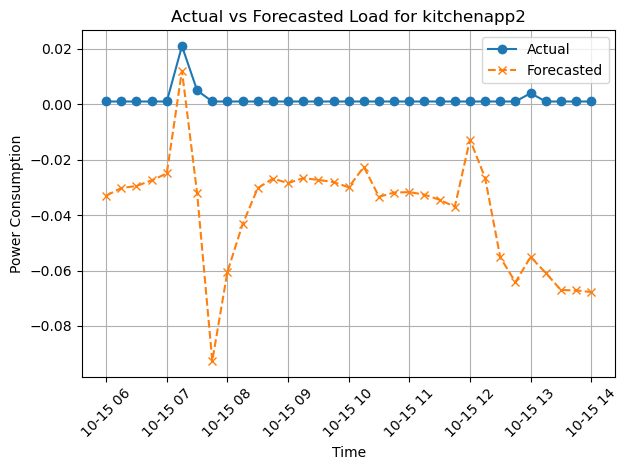

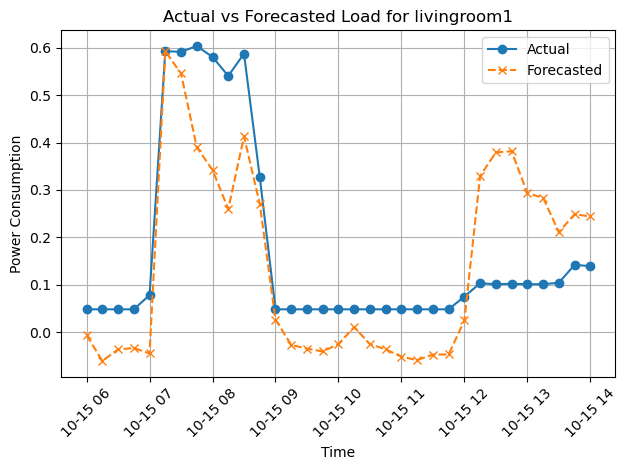

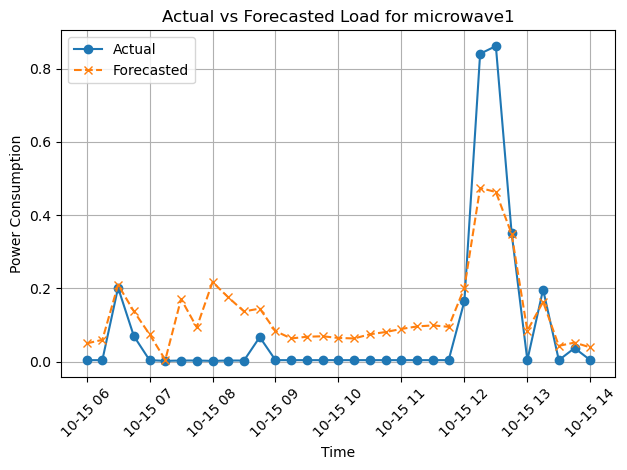

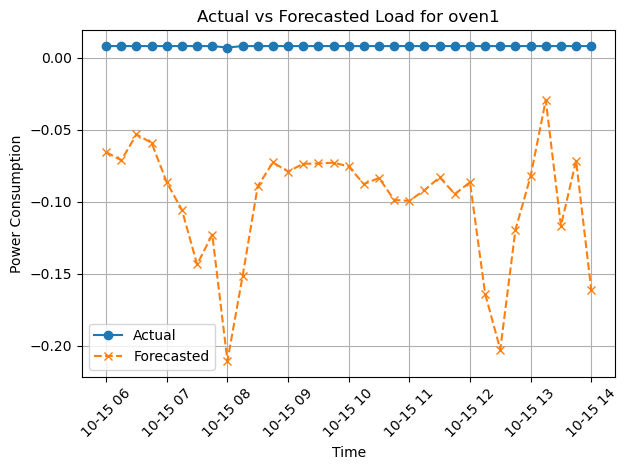

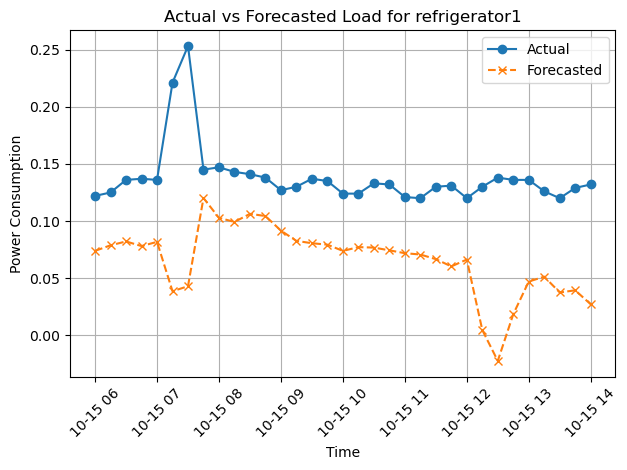

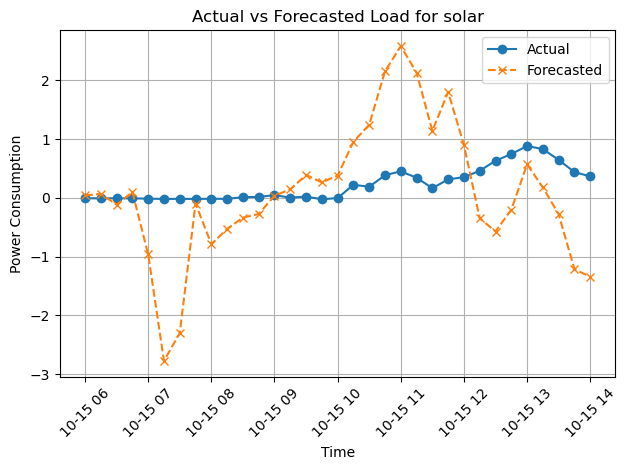

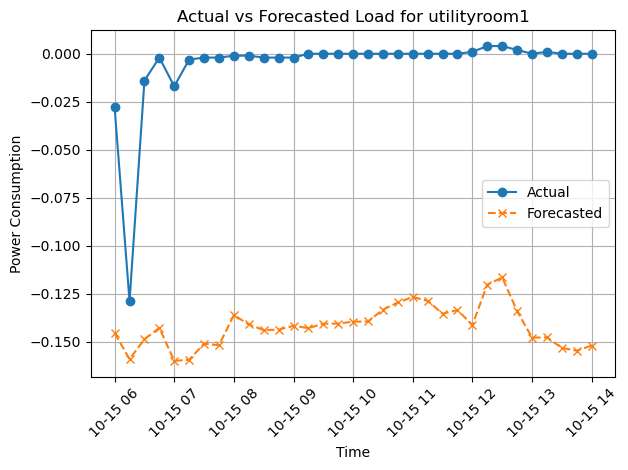

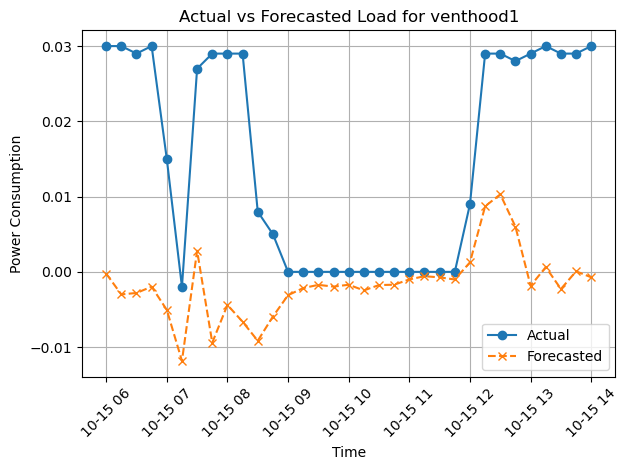

In [ ]:
def forecast_for_date(model, date, data, time_steps, scaler):
    if date not in data.index:
        raise ValueError(f"Date {date} not found in dataset")
    
    idx = data.index.get_loc(date)
    if idx < time_steps:
        raise ValueError("Not enough historical data to make a prediction")
    
    input_seq = data.iloc[idx - time_steps:idx].values.reshape(1, time_steps, -1)
    scaled_prediction = model.predict(input_seq)
    prediction = scaler.inverse_transform(scaled_prediction)
    
    return prediction.flatten()  


start_time = "2018-10-15 06:00:00"
end_time = "2018-10-15 14:00:00"


time_range = pd.date_range(start=start_time, end=end_time, freq="15T")

appliance_names = data.columns 

actual_values = {appliance: [] for appliance in appliance_names}
forecasted_values = {appliance: [] for appliance in appliance_names}

for time in time_range:
    time_str = str(time)
    
    if time_str in data.index:
        actual_vals = data.loc[time_str].values 
        forecast_vals = forecast_for_date(model, time_str, data, time_steps, scaler)

        for i, appliance in enumerate(appliance_names):
            actual_values[appliance].append(actual_vals[i])
            forecasted_values[appliance].append(forecast_vals[i])
    else:
        for appliance in appliance_names:
            actual_values[appliance].append(np.nan)
            forecasted_values[appliance].append(np.nan)

plt.figure(figsize=(12, 20))

for i, appliance in enumerate(appliance_names):
    plt.plot(time_range, actual_values[appliance], label="Actual", marker="o")
    plt.plot(time_range, forecasted_values[appliance], label="Forecasted", linestyle="dashed", marker="x")
    plt.xlabel("Time")
    plt.ylabel("Power Consumption")
    plt.title(f"Actual vs Forecasted Load for {appliance}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()